In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tt
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


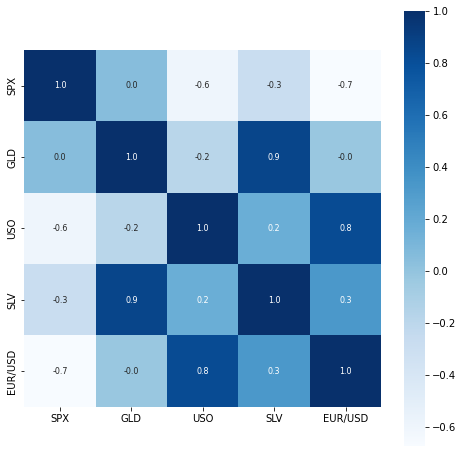

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


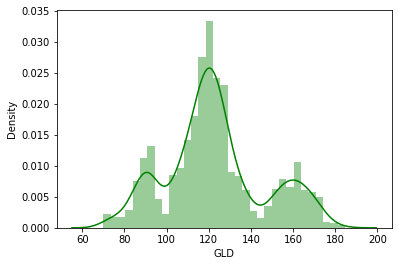

In [3]:
# Heatmap
correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap="Blues")
plt.show()
print(correlation['GLD'])

# Distribution of GLD price
sns.distplot(df['GLD'],color='Green')
plt.show()

In [4]:
x = df.drop(["Date","GLD"],axis=1)
y = df["GLD"]

x_train,x_test,y_train,y_test = tt(x,y,train_size=0.78,random_state=0)

In [5]:
clf = RandomForestRegressor(n_estimators=100,random_state=0)
clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [7]:
train_error = r2_score(y_train,y_train_pred)
test_error = r2_score(y_train,y_train_pred)
print("Training Error:",train_error)
print("Testing Error:",test_error)

Training Error: 0.9983064841783617
Testing Error: 0.9983064841783617


In [ ]:
Plotting - Acual Data vs Predicted

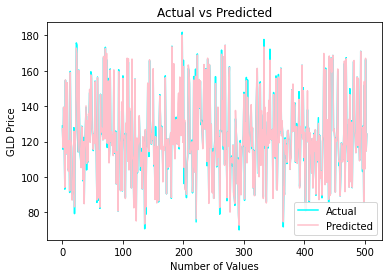

In [9]:
n = list(y_test)
n_pred = list(y_test_pred)
plt.plot(n,color='cyan',label="Actual")
plt.plot(n_pred,color='pink',label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()